In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-vnaak96l
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-vnaak96l
     |████████████████████████████████| 143kB 6.3MB/s 
  Created wheel for yake: filename=yake-0.4.3-py2.py3-none-any.whl size=67198 sha256=6b15597555b4842c9c973b193500362782b4809479ad130c00417e1be4cb509e
  Stored in directory: /tmp/pip-ephem-wheel-cache-51il2yzf/wheels/be/35/27/e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
  Created wheel for segtok: filename=segtok-1.5.9-cp36-none-any.whl size=24853 sha256=0191c51fdeec76c61dd8731b3c256734f821c2a93da5a415793f2733a5d1153b
  Stored in directory: /root/.cache/pip/wheels/8b/a3/41/54616e3b92f9a3d1b99fc99955a4089f9e6b1d274e66da250c
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73000 sha256=569949246bd38e90ede515a1b632840d4b7433c2ab826d900050266fa11816f8
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d31

In [1]:
!pip install lime

In [ ]:
import yake

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , matthews_corrcoef 
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
#import matplotlib
from sklearn.pipeline import Pipeline
#import seaborn as sns
#from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

## for explainer
from lime import lime_text

## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
PATH = r'/content/drive/My Drive/Colab Notebooks/Msc project/'
train = pd.read_csv(PATH + 'train_FA.csv')
test = pd.read_csv(PATH + 'test_FA.csv')

In [4]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)
#train.head()

In [5]:
data = pd.DataFrame(columns=['train','test'], index=['Number of samples'])
data['train'] = train.shape[0]
data['test'] = test.shape[0]
data

,train,test
Number of samples,736771,184156


In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(25,25))
plt.title('Correlation of labels',y=1.05,size=14)
sns.heatmap(train.loc[:,tags].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white');

In [6]:

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    '''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
    '''
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [8]:
lst_stopwords = nltk.corpus.stopwords.words("english")


In [7]:
train.head()

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords
0,a weekend of food craft beer and beaches on th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,en,food craft beer delaware shore weekend of food,food,12,7,51,16,5
1,peace love compassion forgiveness and gratitude,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en,peace love compassion love compassion forgiven...,love,6,4,42,18,1
2,wyomings pronghorn gauntlet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,wyomings pronghorn gauntlet wyomings pronghorn...,None,3,3,25,17,0
3,best open source android apps you must try them,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en,open source android source android apps open s...,android,9,4,39,17,2
4,planning for mismatched bridesmaid dresses tip...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,en,mismatched bridesmaid dresses bridesmaid dress...,None,7,6,52,19,2


In [9]:
train["Title"] = train["Title"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
train.head()

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords
0,weekend food craft beer beach delaware shore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,en,food craft beer delaware shore weekend of food,food,12,7,51,16,5
1,peace love compassion forgiveness gratitude,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en,peace love compassion love compassion forgiven...,love,6,4,42,18,1
2,wyoming pronghorn gauntlet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,wyomings pronghorn gauntlet wyomings pronghorn...,None,3,3,25,17,0
3,best open source android apps must try,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en,open source android source android apps open s...,android,9,4,39,17,2
4,planning mismatched bridesmaid dress tip success,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,en,mismatched bridesmaid dresses bridesmaid dress...,None,7,6,52,19,2


In [10]:
test["Title"] = test["Title"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

In [109]:
## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=100000, ngram_range=(1,3),max_df=0.5,min_df=5)

In [110]:
corpus = train["Title"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [111]:
X_train

<736771x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 4326671 stored elements in Compressed Sparse Row format>

In [ ]:
import seaborn as sns
sns.heatmap(X_train.todense()[:,np.random.randint(0,train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [112]:
from sklearn.feature_selection import chi2

# y = labels.to_numpy
# X = X_train.toarray()
X_names = vectorizer.get_feature_names()
p_value_limit = 0.99
dtf_features = pd.DataFrame()



In [113]:
for cat in tags:
  _ , p = chi2(X_train,labels.loc[:,cat]==1)
  dtf_features = dtf_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":cat}))
  dtf_features = dtf_features.sort_values(["y","score"], ascending=[True,False])
  dtf_features = dtf_features[dtf_features["score"]>p_value_limit]

In [114]:
dtf_features['score'].tail()

97677    0.990086
41691    0.990081
17050    0.990061
27004    0.990049
6602     0.990046
Name: score, dtype: float64

In [115]:
X_names = dtf_features["feature"].unique().tolist()

In [116]:
for cat in tags:
  print("# {}:".format(cat))
  print("  . selected features:",len(dtf_features[dtf_features["y"]==cat]))
  print("  . top features:", ",".join(
  dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
  print(" ")

# android:
  . selected features: 3329
  . top features: acmarket,action launcher,activity,activity android,activity fragment,activity lifecycle,adapter,adb,advice sport,advice sport betting
 
# apple:
  . selected features: 2552
  . top features: accessory,airplay,airpods,airpower,amazon apple,android apple,android io,animoji,apologizes,app
 
# art:
  . selected features: 2659
  . top features: abramovic,abstract,abstract art,abstract expressionism,abstract painting,acrylic,acrylic painting,admission,admission kempegowda,admission kempegowda institute
 
# artificial intelligence:
  . selected features: 3986
  . top features: accelerating artificial,accelerating artificial intelligence,adhive,adversarial,adversarial network,afraid artificial,afraid artificial intelligence,age artificial,age artificial intelligence,agent
 
# big data:
  . selected features: 2838
  . top features: advanced analytics,age big,age big data,airflow,alibaba,alibaba cloud,alternative data,amazon athena,amazon 

In [117]:
vectorizer = TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [118]:
X_train

<736771x93537 sparse matrix of type '<class 'numpy.float64'>'
	with 3267934 stored elements in Compressed Sparse Row format>

Text(0.5, 1.0, 'Sparse Matrix Sample')

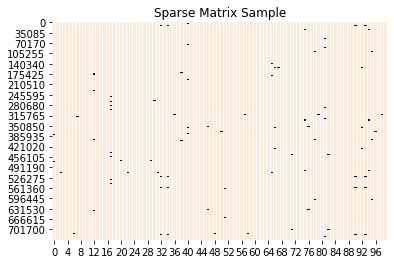

In [20]:
sns.heatmap(X_train.todense()[:,np.random.randint(0,train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [120]:
clf = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None, alpha=0.001))
clf.fit(X_train, labels)



OneVsRestClassifier(estimator=MultinomialNB(alpha=0.001, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [121]:
X_test = vectorizer.transform(test['Title'])
predictions = clf.predict(X_test)
predicted_prob = clf.predict_proba(X_test)

In [122]:
from sklearn.metrics import accuracy_score, hamming_loss,zero_one_loss,auc
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#predictions = best_clf.predict_proba(features_test.Title +' '+ features_test.key_word +' '+ features_test.tags)


for val in thresholds:
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    print(f"thresholds: {val}")
    print(f"accuracy_score: {accuracy_score(labels_test,pred)}")
    print(f"hamming_loss: {hamming_loss(labels_test,pred)}")
    print(f"zero_one_loss: {zero_one_loss(labels_test,pred)}")

thresholds: 0.1
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.2
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.3
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.4
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.5
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.6
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.7
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.8
accuracy_score: 0.1521807597906123
hamming_loss: 0.019075955238510967
zero_one_loss: 0.8478192402093877
thresholds: 0.9
accuracy_score: 0.152180

In [123]:
val = 0.2
pred=predictions.copy()
pred[pred>=val]=1
pred[pred<val]=0

In [124]:
print(classification_report(labels_test,pred,target_names=tags))

                         precision    recall  f1-score   support

                android       0.83      0.36      0.51      2742
                  apple       0.74      0.21      0.33      1482
                    art       0.79      0.07      0.13      4710
artificial intelligence       0.64      0.15      0.25      4269
               big data       0.77      0.10      0.18      1142
       blacklivesmatter       0.50      0.07      0.12       974
             blockchain       0.85      0.55      0.67     14910
                   blog       0.81      0.02      0.03      1185
                  books       0.80      0.12      0.20      2719
               business       0.64      0.01      0.01      5483
                culture       0.53      0.01      0.01      3098
                   data       0.34      0.01      0.02      1239
           data science       0.61      0.12      0.20      2555
                 design       0.83      0.18      0.30      8093
                   dogs 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature engineering

In [ ]:
#kw_extractor = yake.KeywordExtractor(top=3,n=3)

### key term

In [ ]:
# def key_term(text):
#  keys = kw_extractor.extract_keywords(text)
#  term = [key[0] for key in keys]
#  return " ".join(term)


In [ ]:
# %%time
# train['key_word'] = train.Title.apply(lambda text: key_term(text))
# test['key_word'] = test.Title.apply(lambda text: key_term(text))

/usr/local/lib/python3.6/dist-packages/yake/datarepresentation.py:106: RuntimeWarning: Mean of empty slice.
  avgTF = validTFs.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


CPU times: user 34min 26s, sys: 13.5 s, total: 34min 39s
Wall time: 34min 40s


In [ ]:
vague_statement = train.key_word[train.key_word.isnull() == False].index
vague_statement

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            740635, 740636, 740637, 740638, 740639, 740640, 740641, 740642,
            740643, 740644],
           dtype='int64', length=736771)

In [ ]:
train = train.filter(vague_statement,axis=0)

In [ ]:
vague_statement = test.key_word[test.key_word.isnull() == False].index
vague_statement
test = test.filter(vague_statement,axis=0)

### tags in title

In [ ]:
# def tags(text):
#   ltags = []
#   flag = 0
#   #words = text.strip().split(' ')
#   for label in list(train.columns[1:-3]):
#     if label in text:
#         ltags.append(label)
#         flag = 1
#   else:
#     if flag == 0:
#       ltags.append('None')
#       flag = 0

#   return " ".join(ltags)

In [ ]:
# train['tags'] = train.Title.apply(lambda x: tags(x))
# test['tags'] = test.Title.apply(lambda x: tags(x))

In [ ]:
#train.to_csv(PATH + 'train_FA.csv')
#test.to_csv(PATH + 'test_FA.csv')

In [ ]:
s = [len(w) for w in train.Title[0].split(' ')]
print(sum(s))


51


### words

In [ ]:
t = train.Title[0].split(" ")
c = 0
for w in t:
  if w in stopwords.words('english'):
    c += 1
c

5

In [ ]:
def letters_cnt(text):
  s = [len(w) for w in text.split(' ')]
  return(sum(s))

In [ ]:
def cnt_stopwords(text):
  cnt = 0
  words = [w for w in text.split(' ')]
  for word in words:
    if word in stopwords.words('english'):
      cnt +=1
  return cnt  


In [ ]:
%%time
# number of unique words in title
train['number_unique_words'] = train.Title.apply(lambda text: len(set(text.split(" "))))
test['number_unique_words'] = test.Title.apply(lambda text: len(set(text.split(" "))))
%%time
# number of unique words in key term
train['number_unique_key_word'] = train.key_word.apply(lambda text: len(set(text.split(" "))))
test['number_unique_key_word'] = test.key_word.apply(lambda text: len(set(text.split(" "))))
%%time
# number of letters
train['number_letters'] = train.Title.apply(lambda text: letters_cnt(text))
test['number_letters'] = test.Title.apply(lambda text: letters_cnt(text))
%%time
# number of unique letters 
train['number_unique_letters'] = train.Title.apply(lambda text: len(list(set(text))))
test['number_unique_letters'] = test.Title.apply(lambda text: len(list(set(text))))
%%time
# number of stop words
train['number_stopwords'] = train.Title.apply(lambda text: cnt_stopwords(text))
test['number_stopwords'] = test.Title.apply(lambda text: cnt_stopwords(text))

In [ ]:
train

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords
0,a weekend of food craft beer and beaches on th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,en,food craft beer delaware shore weekend of food,food,12,7,51,16,5
1,peace love compassion forgiveness and gratitude,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en,peace love compassion love compassion forgiven...,love,6,4,42,18,1
2,wyomings pronghorn gauntlet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,wyomings pronghorn gauntlet wyomings pronghorn...,None,3,3,25,17,0
3,best open source android apps you must try them,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en,open source android source android apps open s...,android,9,4,39,17,2
4,planning for mismatched bridesmaid dresses tip...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,en,mismatched bridesmaid dresses bridesmaid dress...,None,7,6,52,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740640,free luann shirt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,free luann shirt free luann luann shirt,None,3,3,14,12,0
740641,powerful lyrics today,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,powerful lyrics today powerful lyrics lyrics t...,None,4,3,19,16,0
740642,luc descheemaeker bully boys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,luc descheemaeker bully descheemaeker bully bo...,None,4,4,25,15,0
740643,billion dollar man in big tech town follows dr...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11,en,billion dollar man big tech town billion dollar,tech,11,6,49,19,1


In [ ]:

scaler = MinMaxScaler()
train[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]  = scaler.fit_transform(train[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']])


In [ ]:
test[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]  = scaler.fit_transform(test[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']])

In [11]:
tags = train.columns[1:-9]
tags


Index(['android', 'apple', 'art', 'artificial intelligence', 'big data',
       'blacklivesmatter', 'blockchain', 'blog', 'books', 'business',
       'culture', 'data', 'data science', 'design', 'dogs', 'education',
       'energy', 'entrepreneurship', 'environment', 'feminism', 'fiction',
       'food', 'google', 'health', 'history', 'humor', 'investing', 'ios',
       'javascript', 'jobs', 'journalism', 'leadership', 'life',
       'life lessons', 'love', 'machine learning', 'marketing', 'mobile',
       'movies', 'music', 'news', 'parenting', 'photography', 'poetry',
       'politics', 'productivity', 'programming', 'psychology', 'science',
       'self improvement', 'social media', 'software engineering', 'sports',
       'startup', 'tech', 'technology', 'travel', 'web development', 'women',
       'wordpress', 'work', 'writing'],
      dtype='object')

In [12]:
features = train.loc[:,['Title','word_cnt','key_word','tags','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]
labels = train.iloc[:,1:-9]


In [13]:
features_test = test.loc[:,['Title','word_cnt','key_word','tags','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]
labels_test = test.iloc[:,1:-9]

In [ ]:
features.head(10)

,Title,word_cnt,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords
0,a weekend of food craft beer and beaches on th...,0.818182,food craft beer delaware shore weekend of food,food,0.846154,0.750,0.387097,0.521739,0.384615
1,peace love compassion forgiveness and gratitude,0.272727,peace love compassion love compassion forgiven...,love,0.384615,0.375,0.314516,0.608696,0.076923
2,wyomings pronghorn gauntlet,0.000000,wyomings pronghorn gauntlet wyomings pronghorn...,None,0.153846,0.250,0.177419,0.565217,0.000000
3,best open source android apps you must try them,0.545455,open source android source android apps open s...,android,0.615385,0.375,0.290323,0.565217,0.153846
4,planning for mismatched bridesmaid dresses tip...,0.454545,mismatched bridesmaid dresses bridesmaid dress...,None,0.461538,0.625,0.395161,0.652174,0.153846
5,the chicken crossed the road by all your favor...,1.000000,chicken crossed crossed the road favorite news...,news,0.846154,0.750,0.524194,0.695652,0.461538
6,can medical marijuana alleviate the opioid cri...,0.454545,medical marijuana alleviate opioid crisis medi...,None,0.538462,0.500,0.322581,0.608696,0.153846
7,how artificial intelligence and blockchain are...,1.000000,artificial intelligence intelligence and block...,art artificial intelligence blockchain,0.923077,0.625,0.677419,0.782609,0.461538
8,discover a new artist on audiomack reggaes new...,0.636364,jamaica playlist artist on audiomack audiomack...,art,0.615385,0.625,0.411290,0.739130,0.153846
9,bithesap comtrkiyenin en hzl ve hesapl bitcoin...,0.636364,bithesap comtrkiyenin altcoin borsas comtrkiye...,None,0.615385,0.625,0.419355,0.652174,0.153846


In [ ]:
labels

,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
736767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
736768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
736769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_df=0.25, max_features= 10000, stop_words='english') # max_features = 161108
X_train_dtm  = vectorizer.fit_transform(features.Title +' '+ features.key_word +' '+ features.tags)
X_val_dtm  = vectorizer.transform(features_test.Title +' '+  features_test.key_word +' '+ features_test.tags)

In [ ]:
vectorizer.get_feature_names()

In [ ]:
# vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=100) # max_features = 29428
# X_train_dtm  = vectorizer.fit_transform(X_train.key_word)
# X_test_dtm  = vectorizer.transform(X_test.key_word)

In [ ]:
#switch to assert
print(X_train_dtm.shape)
print(X_val_dtm.shape)

(736771, 10000)
(736771, 10000)


In [ ]:
X_train_dtm = hstack((X_train_dtm, np.array(features[['word_cnt']]).reshape(-1,1)))
X_val_dtm = hstack((X_val_dtm, np.array(features_test[['word_cnt']]).reshape(-1,1)))

ValueError: ignored

In [ ]:
X_train_dtm = hstack((X_train_dtm, np.array(features[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]).reshape(-1,6)))
X_val_dtm = hstack((X_val_dtm, np.array(features_test[['word_cnt','number_unique_words',
                        'number_unique_key_word','number_letters',
                        'number_unique_letters', 'number_stopwords']]).reshape(-1,6)))

ValueError: ignored

In [ ]:
print(X_train_dtm.shape)
print(X_val_dtm.shape)

In [ ]:
vectorizer_tag = TfidfVectorizer(ngram_range=(1,2), max_features=100, min_df=2, max_df=0.1, stop_words='english') 
X_train_tags_dtm  = vectorizer_tag.fit_transform(features.tags)
X_val_tags_dtm  = vectorizer_tag.transform(features_test.tags)

In [ ]:
print(X_train_tags_dtm.shape)
print(X_val_tags_dtm.shape)

(736771, 100)
(184156, 100)


In [ ]:
X_train_dtm = hstack((X_train_dtm, X_train_tags_dtm.reshape(-1,100)))
X_val_dtm = hstack((X_val_dtm, X_val_tags_dtm.reshape(-1,100)))

In [ ]:
print(X_train_dtm.shape)
print(X_val_dtm.shape)

(736771, 406)
(184156, 406)


In [ ]:
vectorizer_key_word = TfidfVectorizer(ngram_range=(1,3), max_df=0.25, max_features= 100, stop_words='english') 
X_train_key_word_dtm  = vectorizer_key_word.fit_transform(features.key_word)
X_val_key_word_dtm  = vectorizer_key_word.transform(features_test.key_word)

In [ ]:
print(X_train_key_word_dtm.shape)
print(X_val_key_word_dtm.shape)
X_train_dtm = hstack((X_train_dtm, X_train_key_word_dtm.reshape(-1,100)))
X_val_dtm = hstack((X_val_dtm, X_val_key_word_dtm.reshape(-1,100)))
print(X_train_dtm.shape)
print(X_val_dtm.shape)

(736771, 100)
(184156, 100)
(736771, 401)
(184156, 401)


In [ ]:
def weight(label):
  n_samples = labels.shape[0]
  n_classes = 2
  y = np.bincount(labels[label])
  res = n_samples / (n_classes * y)

  return {0:res[0],1:res[1]}

In [ ]:
9# random.seed(101)
# label = random.choice(list(labels.columns))
# print(label)

mobile


## Grid search

In [14]:
parameters = {
    'tfidf__max_df': (0.1, 0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'tfidf__max_features': (300,500, 1000,5000,10000,20000),
    # 'clf__estimator' : [MultinomialNB(fit_prior=True, class_prior=None),
    #          LinearSVC(class_weight='balanced'),
    #          LogisticRegression(class_weight='balanced', solver='lbfgs')] 
} 

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
])

grid_search_tune = GridSearchCV(
      pipeline, parameters, cv=5, n_jobs=-1, verbose=3,scoring='f1_micro', return_train_score=True)
grid_search_tune.fit(train['Title'], labels)

# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english',max_features=10000, ngram_range=(1,3))),
#     ('clf', OneVsRestClassifier(SGDClassifier(alpha=0.01, class_weight='balanced'))),
#])

# parameters = {
#     'tfidf__max_df': (0.1, 0.25, 0.5, 0.75),
#     'tfidf__ngram_range': [(1, 2), (1, 3)],
#     'tfidf__max_features': (300,500, 1000,5000,10000,20000),
#     'clf__estimator__alpha': (0.01,0.001)
# }


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 97.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 187.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [ ]:
parameters = {
    'tfidf__max_df': (0.1, 0.25, 0.5, 0.75, 0.9),
    'tfidf__ngram_range': [(1,1),(1, 2), (1, 3)],
    'tfidf__max_features': (100,300,500, 1000,2000,5000,10000,20000)
    'clf__estimator__alpha': (,0.001, 0.000001)
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
])


grid_search_tune = GridSearchCV(
      pipeline, parameters, cv=5, n_jobs=-1, verbose=3,scoring='f1_micro', return_train_score=True)
grid_search_tune.fit(X_train, labels)

In [ ]:
# clf = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
# grid_search_tune = GridSearchCV(
#     clf, {'estimator__alpha': (0.1,0.01)}, cv=5, n_jobs=-1, verbose=3, scoring='f1_micro', return_train_score=True)

#grid_search_tune.fit(features.Title +' '+ features.key_word +' '+ features.tags, labels)

# grid_search_tune = GridSearchCV(
#     pipeline, parameters, cv=5, n_jobs=-1, verbose=3, scoring='f1_micro')
grid_search_tune = GridSearchCV(
     pipeline, parameters, cv=3, n_jobs=-1, verbose=3,scoring='accuracy', return_train_score=True)
grid_search_tune.fit(features.Title +' '+ features.key_word +' '+ features.tags, labels)


#print("Best parameters set:")
#print(grid_search_tune.best_estimator_.steps)



Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 63.4min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 73.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [ ]:

print("Best parameters set:")
print(grid_search_tune.best_estimator_)
print('*******')
grid_search_tune.best_score_

Best parameters set:
Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.1, max_features=20000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01,
                                               

0.16161738284595661

In [ ]:
res = grid_search_tune.cv_results_

In [ ]:
res

{'mean_fit_time': array([25.52424192, 25.12022352, 25.39328972, 25.48693538, 25.91750677,
        26.07051643, 25.45378963, 25.47519493, 26.48354705, 26.91018748,
        26.23225268, 26.59395774, 25.58409937, 25.81437937, 26.08758211,
        27.31107116, 26.76187499, 26.82708184, 26.02350807, 26.46605031,
        25.9002378 , 26.22826266, 27.14745919, 26.80845229, 25.78429588,
        26.02678291, 25.864923  , 26.29780157, 27.3230811 , 27.17875258,
        25.88679544, 26.10576582, 26.14518809, 26.53807354, 26.66517218,
        27.77449179, 25.98096434, 25.88445059, 25.92609517, 26.55996784,
        26.87226415, 27.45908197, 26.83682839, 26.28451808, 26.29783201,
        26.82577745, 26.81733425, 24.61729662]),
 'mean_score_time': array([10.75572673, 10.85095493, 10.90319133, 11.1317815 , 11.34785843,
        11.49646099, 10.71603568, 11.06786656, 11.00614421, 11.60065667,
        11.62767482, 11.732421  , 10.85438116, 11.1606857 , 11.07791924,
        11.55292304, 11.69870909, 11.73

ValueError: ignored

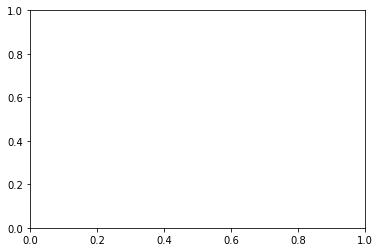

In [ ]:
alph = np.log([1.0,0.1,0.01,0.001,0.0001, 0.00001])
max_feature = [100,300,500, 1000,2000,5000,10000,20000]
max_df = [0.1, 0.25, 0.5, 0.75, 0.9]
train_score = res['mean_train_score']
test_score = res['mean_test_score']

plt.plot(max_df,train_score,color ='blue',linestyle='dashed', label = 'train')
plt.plot(max_df, test_score,color ='red',label = 'test')
plt.ylabel('precision')
plt.xlabel('max df')
plt.title('Max df in Navie Bayes')
plt.legend()


In [ ]:
scores = [x[1] for x in grid_search_tune.cv_results_]
#scores = np.array(scores).reshape()
scores
# for ind, i in enumerate(Cs):
#     plt.plot(Gammas, scores[ind], label='C: ' + str(i))
# plt.legend()
# plt.xlabel('Gamma')
# plt.ylabel('Mean score')
# plt.show()

['e',
 't',
 'e',
 't',
 'a',
 'a',
 'a',
 'a',
 'p',
 'p',
 'p',
 'p',
 'p',
 'e',
 't',
 'a']

In [ ]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(features_test.Title +' '+ features_test.key_word +' '+ features_test.tags)

print(classification_report(labels_test, predictions,target_names=tags))

Applying best classifier on test data:
                         precision    recall  f1-score   support

                android       0.83      0.40      0.54      2742
                  apple       0.73      0.25      0.37      1482
                    art       0.75      0.06      0.12      4710
artificial intelligence       0.66      0.22      0.34      4269
               big data       0.79      0.13      0.22      1142
       blacklivesmatter       0.53      0.07      0.12       974
             blockchain       0.85      0.54      0.66     14910
                   blog       0.70      0.01      0.03      1185
                  books       0.79      0.15      0.25      2719
               business       0.50      0.01      0.01      5483
                culture       0.52      0.01      0.01      3098
                   data       0.24      0.01      0.02      1239
           data science       0.63      0.14      0.24      2555
                 design       0.79      0.18      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss,zero_one_loss

thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

predictions = best_clf.predict_proba(features_test.Title +' '+ features_test.key_word +' '+ features_test.tags)


for val in thresholds:
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    print(f"thresholds: {val}")
    print(f"accuracy_score: {accuracy_score(labels_test,pred)}")
    print(f"hamming_loss: {hamming_loss(labels_test,pred)}")
    print(f"zero_one_loss: {zero_one_loss(labels_test,pred)}")
    

thresholds: 0.1
accuracy_score: 0.15803449249549295
hamming_loss: 0.03267942887131457
zero_one_loss: 0.841965507504507
thresholds: 0.2
accuracy_score: 0.22274050261734615
hamming_loss: 0.021034235350253536
zero_one_loss: 0.7772594973826539
thresholds: 0.3
accuracy_score: 0.21257520797584656
hamming_loss: 0.019051519434084285
zero_one_loss: 0.7874247920241535
thresholds: 0.4
accuracy_score: 0.1890788244749017
hamming_loss: 0.01874278749643535
zero_one_loss: 0.8109211755250982
thresholds: 0.5
accuracy_score: 0.1624546580073416
hamming_loss: 0.01890131368285934
zero_one_loss: 0.8375453419926584
thresholds: 0.6
accuracy_score: 0.1345055279219792
hamming_loss: 0.019249283041236426
zero_one_loss: 0.8654944720780208
thresholds: 0.7
accuracy_score: 0.10717000803666457
hamming_loss: 0.019673450069331123
zero_one_loss: 0.8928299919633355
thresholds: 0.8
accuracy_score: 0.07817285345033559
hamming_loss: 0.020173114098916135
zero_one_loss: 0.9218271465496644
thresholds: 0.9
accuracy_score: 0.04536

In [ ]:
pred=predictions.copy()
val = 0.2  
pred[pred>=val]=1
pred[pred<val]=0
print(classification_report(labels_test, pred,target_names=tags))

                         precision    recall  f1-score   support

                android       0.63      0.57      0.60      2742
                  apple       0.59      0.44      0.50      1482
                    art       0.54      0.19      0.29      4710
artificial intelligence       0.53      0.44      0.48      4269
               big data       0.53      0.27      0.36      1142
       blacklivesmatter       0.40      0.19      0.26       974
             blockchain       0.70      0.77      0.73     14910
                   blog       0.34      0.05      0.09      1185
                  books       0.61      0.31      0.41      2719
               business       0.32      0.09      0.14      5483
                culture       0.33      0.06      0.10      3098
                   data       0.23      0.08      0.11      1239
           data science       0.45      0.34      0.39      2555
                 design       0.57      0.42      0.48      8093
                   dogs 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions.ravel()

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = len(tags)

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(labels_test.iloc[:, i],
                                                        predictions[:, i])
    average_precision[i] = average_precision_score(labels_test.iloc[:, i], predictions[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(labels_test.to_numpy().ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(labels_test, predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.14


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.14')

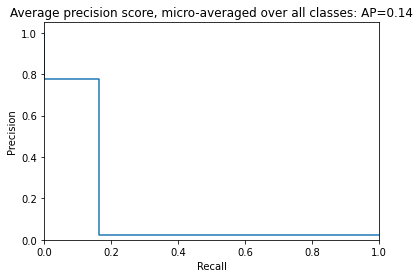

In [70]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


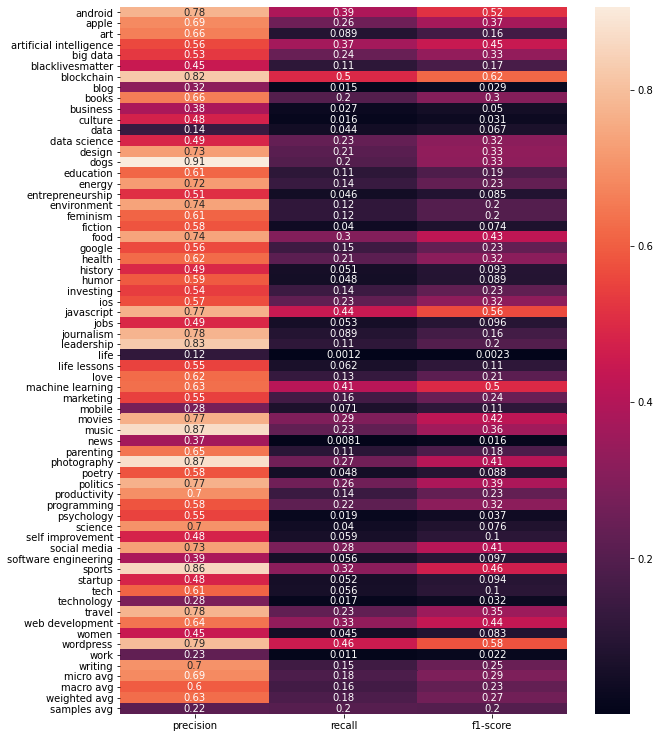

In [ ]:
import seaborn as sns
clf_report = classification_report(labels_test,
                                   predictions,
                                   target_names=tags,
                                   output_dict=True)


plt.figure(figsize=(10,13))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True);

#plt.savefig(PATH + 'NB.jpg')

In [ ]:
results = pd.DataFrame(index=['Naive Bayes'],columns=['Precision','Recall', 'F1 Score'])
NB_res= clf_report['micro avg']
results['Precision'] = NB_res['precision']
results['Recall'] = NB_res['recall']
results['F1 Score'] = NB_res['f1-score']

results

,Precision,Recall,F1 Score
Naive Bayes,0.414968,0.132874,0.201293


In [ ]:

clf_report[]

{'android': {'f1-score': 0.5197505197505198,
  'precision': 0.7088846880907372,
  'recall': 0.4102844638949672,
  'support': 2742},
 'apple': {'f1-score': 0.45126213592233005,
  'precision': 0.5315645013723697,
  'recall': 0.39203778677462886,
  'support': 1482},
 'art': {'f1-score': 0.1456224471674658,
  'precision': 0.44516829533116176,
  'recall': 0.0870488322717622,
  'support': 4710},
 'artificial intelligence': {'f1-score': 0.4094488188976378,
  'precision': 0.44715672676837726,
  'recall': 0.37760599672054346,
  'support': 4269},
 'big data': {'f1-score': 0.2654978083907326,
  'precision': 0.46593406593406594,
  'recall': 0.18563922942206654,
  'support': 1142},
 'blacklivesmatter': {'f1-score': 0.18263665594855308,
  'precision': 0.24440619621342513,
  'recall': 0.1457905544147844,
  'support': 974},
 'blockchain': {'f1-score': 0.4429223744292237,
  'precision': 0.6412407831172133,
  'recall': 0.33829644533869885,
  'support': 14910},
 'blog': {'f1-score': 0.12124779281930548,


In [ ]:
classification_report(labels_test,predictions)

In [ ]:
predictions_proba = best_clf.predict_proba(X_val_dtm)

In [ ]:
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    pred=predictions_proba.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(labels_test, pred, average='micro')
    recall = recall_score(labels_test, pred, average='micro')
    f1 = f1_score(labels_test, pred, average='micro')
    print(f"trashhold value {val}")
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

trashhold value 0.1
Micro-average quality numbers
Precision: 0.1855, Recall: 0.2319, F1-measure: 0.2061
trashhold value 0.2
Micro-average quality numbers
Precision: 0.2784, Recall: 0.1791, F1-measure: 0.2180
trashhold value 0.3
Micro-average quality numbers
Precision: 0.3361, Recall: 0.1574, F1-measure: 0.2144
trashhold value 0.4
Micro-average quality numbers
Precision: 0.3768, Recall: 0.1444, F1-measure: 0.2088
trashhold value 0.5
Micro-average quality numbers
Precision: 0.4150, Recall: 0.1329, F1-measure: 0.2013
trashhold value 0.6
Micro-average quality numbers
Precision: 0.4543, Recall: 0.1217, F1-measure: 0.1920
trashhold value 0.7
Micro-average quality numbers
Precision: 0.4935, Recall: 0.1097, F1-measure: 0.1795
trashhold value 0.8
Micro-average quality numbers
Precision: 0.5446, Recall: 0.0938, F1-measure: 0.1601
trashhold value 0.9
Micro-average quality numbers
Precision: 0.6010, Recall: 0.0765, F1-measure: 0.1357


In [ ]:
  pred=predictions.copy()
  val =0.5
  pred[pred>=val]=1
  pred[pred<val]=0
  

In [ ]:
pred[3]
labels_test.head()

,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(SGDClassifier())),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5)
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'tfidf__max_features': (500,1000),
    'clf__estimator__alpha': (1e-2, 1e-3),
    'clf__estimator__penalty': ('l1','l2','elasticnet'),
    'clf__estimator__loss': ('log','hinge'),
    'clf__estimator__class_weight': [{0: 0.5, 1:}]
}
clf = OneVsRestClassifier(SGDClassifier()))
grid_search_tune = GridSearchCV(clf,
    parameters, cv=5, n_jobs=-1, verbose=3)
grid_search_tune.fit(features.Title, labels)


print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 146.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 258.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 424.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 503.4min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=300,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                          

In [ ]:
parameters = {
    'estimator__penalty': ('l2','elasticnet'),
    'estimator__loss': ('log','hinge')
    
}
clf = OneVsRestClassifier(SGDClassifier(max_iter=10000))
grid_search_tune = GridSearchCV(
    clf, parameters, cv=5, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train_dtm, labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed: 19.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001,
                                                                   average=False,
                                                                   class_weight=None,
                                                                   early_stopping=False,
                                                                   epsilon=0.1,
                                                                   eta0=0.0,
                                                                   fit_intercept=True,
                                                                   l1_ratio=0.15,
                                                                   learning_rate='optimal',
                                                                   loss='hinge',
                                                                   max_iter=10000,
                                            

In [ ]:
print(grid_search_tune.best_estimator_)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)


In [ ]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(X_val_dtm)

print(classification_report(labels_test, predictions,target_names=tags))

Applying best classifier on test data:
                         precision    recall  f1-score   support

                android       0.89      0.39      0.55      2742
                  apple       0.67      0.45      0.54      1482
                    art       0.35      0.12      0.17      4710
artificial intelligence       0.02      0.00      0.00      4269
               big data       0.88      0.19      0.31      1142
       blacklivesmatter       0.00      0.00      0.00       974
             blockchain       0.59      0.36      0.45     14910
                   blog       0.00      0.00      0.00      1185
                  books       0.73      0.16      0.26      2719
               business       0.00      0.00      0.00      5483
                culture       0.00      0.00      0.00      3098
                   data       0.00      0.00      0.00      1239
           data science       0.92      0.10      0.19      2555
                 design       0.42      0.25      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_report = classification_report(labels_test,
                                   predictions,
                                   target_names=tags,
                                   output_dict=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sgd = pd.DataFrame(index=['SGDClassifier'],columns=['Precision','Recall', 'F1 Score'])
sgd_res= clf_report['micro avg']
sgd['Precision'] = sgd_res['precision']
sgd['Recall'] = sgd_res['recall']
sgd['F1 Score'] = sgd_res['f1-score']
sgd


,Precision,Recall,F1 Score
SGDClassifier,0.577594,0.104072,0.176366


In [ ]:
res = pd.concat([results,sgd])
res

,Precision,Recall,F1 Score
Naive Bayes,0.414968,0.132874,0.201293
SGDClassifier,0.577594,0.104072,0.176366


In [ ]:
res.to_csv(PATH + 'ml result.csv')

In [ ]:
parameters = {
    'estimator__penalty': ('l2','elasticnet'),
    'estimator__C': (1.0,0.5,5.0)
    
}
clf = OneVsRestClassifier(LogisticRegression())
grid_search_tune = GridSearchCV(
    clf, parameters, cv=5, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train_dtm, labels)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 49.4min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 76.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGE

GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        random_state=None

In [ ]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(X_val_dtm)

print(classification_report(labels_test, predictions,target_names=tags))

Applying best classifier on test data:
                         precision    recall  f1-score   support

                android       0.90      0.37      0.53      2742
                  apple       0.71      0.33      0.45      1482
                    art       0.02      0.00      0.00      4710
artificial intelligence       0.50      0.00      0.00      4269
               big data       0.92      0.13      0.22      1142
       blacklivesmatter       0.39      0.01      0.01       974
             blockchain       0.74      0.31      0.44     14910
                   blog       0.67      0.00      0.00      1185
                  books       0.62      0.15      0.24      2719
               business       0.00      0.00      0.00      5483
                culture       0.25      0.00      0.00      3098
                   data       0.00      0.00      0.00      1239
           data science       0.91      0.09      0.17      2555
                 design       0.38      0.19      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##1. Naive Bayes

In [ ]:
%%time
decision_df = labels_test.copy()
df_res = pd.DataFrame(index=labels.columns, columns=['balanced accuracy','matthews corrcoef','precision','recall','f1'])
#label = 'android'
for label in list(labels.columns):
  
  clf = OneVsRestClassifier(MultinomialNB(alpha=0.001,fit_prior=True))
  print('fit the model tag {}'.format(label))
  clf.fit(X_train_dtm, labels[label])
  # compute the testing
  print('compute the prediction')
  proba = clf.predict_proba(X_val_dtm)
  pos = [p[1] for p in proba]
  decision_df.loc[:,label] = pos
  prediction = clf.predict(X_val_dtm)
  # result
  df_res.loc[label,'balanced accuracy'] = balanced_accuracy_score(labels_test[label], prediction)
  df_res.loc[label,'matthews corrcoef'] = matthews_corrcoef(labels_test[label], prediction)
  df_res.loc[label,'precision'] = precision_score(labels_test[label], prediction)
  df_res.loc[label,'recall'] = recall_score(labels_test[label], prediction)
  df_res.loc[label,'f1'] = f1_score(labels_test[label], prediction)  
  print('classification_report is {}'.format(classification_report(labels_test[label], prediction)))
  #print('matthews_corrcoef is {}'.format(matthews_corrcoef(labels_test[label], prediction)))
  #print('confusion matrix is {}'.format(confusion_matrix(labels_test[label], prediction)))
  print('balanced accuracy is {}'.format(balanced_accuracy_score(labels_test[label], prediction)))

fit the model tag android
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      0.99    181414
           1       0.02      0.00      0.00      2742

    accuracy                           0.98    184156
   macro avg       0.50      0.50      0.50    184156
weighted avg       0.97      0.98      0.98    184156

balanced accuracy is 0.5000252494190282
fit the model tag apple
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      1.00    182674
           1       0.00      0.00      0.00      1482

    accuracy                           0.99    184156
   macro avg       0.50      0.50      0.50    184156
weighted avg       0.98      0.99      0.99    184156

balanced accuracy is 0.49986040706394996
fit the model tag art
compute the prediction
classification_report is               precision    recall  f1-score   sup

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      1.00    183182
           1       0.00      0.00      0.00       974

    accuracy                           0.99    184156
   macro avg       0.50      0.50      0.50    184156
weighted avg       0.99      0.99      0.99    184156

balanced accuracy is 0.5
fit the model tag blockchain
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.92      0.99      0.96    169246
           1       0.32      0.05      0.09     14910

    accuracy                           0.91    184156
   macro avg       0.62      0.52      0.52    184156
weighted avg       0.87      0.91      0.88    184156

balanced accuracy is 0.5203936359769448
fit the model tag blog
compute the prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      1.00    182971
           1       0.00      0.00      0.00      1185

    accuracy                           0.99    184156
   macro avg       0.50      0.50      0.50    184156
weighted avg       0.99      0.99      0.99    184156

balanced accuracy is 0.5
fit the model tag books
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      0.99    181437
           1       0.06      0.00      0.00      2719

    accuracy                           0.98    184156
   macro avg       0.52      0.50      0.50    184156
weighted avg       0.97      0.98      0.98    184156

balanced accuracy is 0.500715528148161
fit the model tag business
compute the prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report is               precision    recall  f1-score   support

           0       0.97      1.00      0.98    178673
           1       0.00      0.00      0.00      5483

    accuracy                           0.97    184156
   macro avg       0.49      0.50      0.49    184156
weighted avg       0.94      0.97      0.96    184156

balanced accuracy is 0.5
fit the model tag culture
compute the prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report is               precision    recall  f1-score   support

           0       0.98      1.00      0.99    181058
           1       0.00      0.00      0.00      3098

    accuracy                           0.98    184156
   macro avg       0.49      0.50      0.50    184156
weighted avg       0.97      0.98      0.97    184156

balanced accuracy is 0.5
fit the model tag data
compute the prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      1.00    182917
           1       0.00      0.00      0.00      1239

    accuracy                           0.99    184156
   macro avg       0.50      0.50      0.50    184156
weighted avg       0.99      0.99      0.99    184156

balanced accuracy is 0.5
fit the model tag data science
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.99      1.00      0.99    181601
           1       0.03      0.00      0.00      2555

    accuracy                           0.99    184156
   macro avg       0.51      0.50      0.50    184156
weighted avg       0.97      0.99      0.98    184156

balanced accuracy is 0.5000883164529071
fit the model tag design
compute the prediction
classification_report is               precision    recall  f1-score   support

           0       0.96      1.00      0.98    17

KeyboardInterrupt: ignored

In [ ]:
clf = OneVsRestClassifier(MultinomialNB(alpha=0.001,fit_prior=True))
clf.fit(X_train_dtm, labels)
# compute the testing
print('compute the prediction')
prediction = clf.predict(X_val_dtm)
print(classification_report(labels_test,prediction, target_names=tags))

compute the prediction
                         precision    recall  f1-score   support

                android       0.02      0.00      0.00      2742
                  apple       0.00      0.00      0.00      1482
                    art       0.15      0.01      0.01      4710
artificial intelligence       0.02      0.00      0.00      4269
               big data       0.00      0.00      0.00      1142
       blacklivesmatter       0.00      0.00      0.00       974
             blockchain       0.32      0.05      0.09     14910
                   blog       0.00      0.00      0.00      1185
                  books       0.06      0.00      0.00      2719
               business       0.00      0.00      0.00      5483
                culture       0.00      0.00      0.00      3098
                   data       0.00      0.00      0.00      1239
           data science       0.03      0.00      0.00      2555
                 design       0.24      0.01      0.02      8093
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
decision_df > 0.5

,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
185159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
df_res.to_csv(PATH + "result_NB_no_weight.csv")

##2. LogisticRegression

In [ ]:
%%time
decision_df = labels_test.copy()
df_res = pd.DataFrame(index=labels.columns, columns=['balanced accuracy','matthews corrcoef','precision','recall','f1'])
#label = 'android'
for label in list(labels.columns):
  
  clf = OneVsRestClassifier(LogisticRegression(C=1,class_weight=weight(label),max_iter=10000))
  print('fit the model tag {}'.format(label))
  clf.fit(X_train_dtm, labels[label])
  # compute the testing
  print('compute the prediction')
  proba = clf.predict_proba(X_val_dtm)
  pos = [p[1] for p in proba]
  decision_df.loc[:,label] = pos
  prediction = clf.predict(X_val_dtm)
  # result
  df_res.loc[label,'balanced accuracy'] = balanced_accuracy_score(labels_test[label], prediction)
  df_res.loc[label,'matthews corrcoef'] = matthews_corrcoef(labels_test[label], prediction)
  df_res.loc[label,'precision'] = precision_score(labels_test[label], prediction)
  df_res.loc[label,'recall'] = recall_score(labels_test[label], prediction)
  df_res.loc[label,'f1'] = f1_score(labels_test[label], prediction)  
  #print('classification_report is {}'.format(classification_report(labels_test[label], prediction)))
  #print('matthews_corrcoef is {}'.format(matthews_corrcoef(labels_test[label], prediction)))
  #print('confusion matrix is {}'.format(confusion_matrix(labels_test[label], prediction)))
  print('balanced accuracy is {}'.format(balanced_accuracy_score(labels_test[label], prediction)))

fit the model tag android
compute the prediction
balanced accuracy is 0.7530235636504121
fit the model tag apple
compute the prediction
balanced accuracy is 0.7590785718183216
fit the model tag art
compute the prediction
balanced accuracy is 0.5893229724048299
fit the model tag artificial intelligence
compute the prediction
balanced accuracy is 0.7176573179214405
fit the model tag big data
compute the prediction
balanced accuracy is 0.6870984404224901
fit the model tag blacklivesmatter
compute the prediction
balanced accuracy is 0.6397626124102247
fit the model tag blockchain
compute the prediction
balanced accuracy is 0.7093046768769897
fit the model tag blog
compute the prediction
balanced accuracy is 0.5995685235402064
fit the model tag books
compute the prediction
balanced accuracy is 0.700352399784449
fit the model tag business
compute the prediction
balanced accuracy is 0.6157636400540851
fit the model tag culture
compute the prediction
balanced accuracy is 0.5960995553137169
fit

In [ ]:
df_res.to_csv(PATH + "result_LR_weight.csv")

##3. SGDClassifier

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
%%time
clf = OneVsRestClassifier(LinearSVC(C=1.0, class_weight='balanced'))
clf.fit(X_train_dtm,labels)
prediction = clf.predict(X_val_dtm)
print(classification_report(labels_test, prediction ,target_names=tags))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyboardInterrupt: ignored

In [ ]:
#proba = clf.predict_proba(X_val_dtm)
proba[5] 

array([7.16967805e-04, 7.08649352e-04, 2.04137059e-03, 4.64013769e-04,
       5.19617333e-04, 2.21086364e-03, 1.68244543e-03, 4.23035280e-02,
       7.65280852e-03, 5.46656709e-03, 1.14782303e-03, 1.16252034e-03,
       9.48536445e-04, 5.96364389e-03, 5.35138898e-04, 1.54851580e-03,
       5.27137338e-04, 3.31141553e-03, 1.99810112e-03, 4.25193972e-03,
       5.42673882e-03, 4.18785322e-03, 2.69966012e-03, 1.52541684e-03,
       5.20635625e-03, 9.08303539e-04, 7.80152580e-04, 5.12091270e-04,
       7.60642348e-03, 8.49788267e-04, 1.64628114e-03, 1.11696738e-03,
       1.47792161e-03, 6.71903893e-03, 5.86936906e-03, 9.84537155e-04,
       4.16163725e-03, 8.13701254e-04, 3.64386024e-03, 3.24750478e-03,
       6.40720604e-03, 1.14063406e-03, 2.03467734e-03, 3.48139714e-03,
       6.47487361e-03, 1.13052489e-03, 7.53607743e-03, 1.39711880e-03,
       1.75242857e-03, 3.89371822e-03, 1.87038641e-03, 5.31902641e-04,
       1.91660653e-03, 1.90164218e-03, 2.92259698e-03, 1.13098399e-03,
      

In [ ]:
features_test.Title[5]

'janet benshoof lawyer who pursued abortion rights for women dies at '

In [ ]:
labels_test.head(11)

,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%time
decision_df = labels_test.copy()
#label = 'android'
for label in list(labels.columns):
  
  clf = OneVsRestClassifier(SGDClassifier(random_state=42,alpha=1e-06,loss='log',penalty='elasticnet', class_weight=None))
  print('fit the model tag {}'.format(label))
  clf.fit(X_train_dtm, labels[label])
  # compute the testing
  print('compute the prediction')
  proba = clf.predict_proba(X_val_dtm)
  pos = [p[1] for p in proba]
  decision_df.loc[:,label] = pos
  prediction = clf.predict(X_val_dtm)
  # result
  df_res.loc[label,'balanced accuracy'] = balanced_accuracy_score(labels_test[label], prediction)
  df_res.loc[label,'matthews corrcoef'] = matthews_corrcoef(labels_test[label], prediction)
  df_res.loc[label,'precision'] = precision_score(labels_test[label], prediction)
  df_res.loc[label,'recall'] = recall_score(labels_test[label], prediction)
  df_res.loc[label,'f1'] = f1_score(labels_test[label], prediction)  
  #print('classification_report is {}'.format(classification_report(labels_test[label], prediction)))
  #print('matthews_corrcoef is {}'.format(matthews_corrcoef(labels_test[label], prediction)))
  #print('confusion matrix is {}'.format(confusion_matrix(labels_test[label], prediction)))
  print('balanced accuracy is {}'.format(balanced_accuracy_score(labels_test[label], prediction)))

fit the model tag android
compute the prediction
balanced accuracy is 0.701378522588464
fit the model tag apple
compute the prediction
balanced accuracy is 0.6314838648946346
fit the model tag art
compute the prediction
balanced accuracy is 0.5009804616156076
fit the model tag artificial intelligence
compute the prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


balanced accuracy is 0.5
fit the model tag big data
compute the prediction
balanced accuracy is 0.4999726796857071
fit the model tag blacklivesmatter
compute the prediction
balanced accuracy is 0.5126235020760201
fit the model tag blockchain
compute the prediction
balanced accuracy is 0.646688302534206
fit the model tag blog
compute the prediction
balanced accuracy is 0.5022611108947264
fit the model tag books
compute the prediction
balanced accuracy is 0.5380860195540443
fit the model tag business
compute the prediction
balanced accuracy is 0.5016346838340019
fit the model tag culture
compute the prediction
balanced accuracy is 0.4999972384539761
fit the model tag data
compute the prediction
balanced accuracy is 0.4997457863402527
fit the model tag data science
compute the prediction
balanced accuracy is 0.5796022108682795
fit the model tag design
compute the prediction
balanced accuracy is 0.5010116796965401
fit the model tag dogs
compute the prediction
balanced accuracy is 0.4999591

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


balanced accuracy is 0.5
fit the model tag history
compute the prediction
balanced accuracy is 0.49916578546639045
fit the model tag humor
compute the prediction
balanced accuracy is 0.4999447547386623
fit the model tag investing
compute the prediction
balanced accuracy is 0.5206082736454367
fit the model tag ios
compute the prediction
balanced accuracy is 0.529514243935173
fit the model tag javascript
compute the prediction
balanced accuracy is 0.5806622824774017
fit the model tag jobs
compute the prediction
balanced accuracy is 0.6211976712005157
fit the model tag journalism
compute the prediction
balanced accuracy is 0.5842047422219293
fit the model tag leadership
compute the prediction
balanced accuracy is 0.546719511239844
fit the model tag life
compute the prediction
balanced accuracy is 0.5014655470391057
fit the model tag life lessons
compute the prediction
balanced accuracy is 0.5226071487240408
fit the model tag love
compute the prediction
balanced accuracy is 0.5015222669570

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


balanced accuracy is 0.5
fit the model tag parenting
compute the prediction
balanced accuracy is 0.5330777552985376
fit the model tag photography
compute the prediction
balanced accuracy is 0.5583886118584769
fit the model tag poetry
compute the prediction
balanced accuracy is 0.5001507141911883
fit the model tag politics
compute the prediction
balanced accuracy is 0.5059977499399985
fit the model tag productivity
compute the prediction
balanced accuracy is 0.5310655041288375
fit the model tag programming
compute the prediction
balanced accuracy is 0.5343719447704205
fit the model tag psychology
compute the prediction
balanced accuracy is 0.5126112084488084
fit the model tag science
compute the prediction
balanced accuracy is 0.5065938938153437
fit the model tag self improvement
compute the prediction
balanced accuracy is 0.5020343836944596
fit the model tag social media
compute the prediction
balanced accuracy is 0.6440392820067147
fit the model tag software engineering
compute the pr

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


balanced accuracy is 0.5
fit the model tag sports
compute the prediction
balanced accuracy is 0.5298597652691959
fit the model tag startup
compute the prediction
balanced accuracy is 0.5351148174903494
fit the model tag tech
compute the prediction
balanced accuracy is 0.4999944405837387
fit the model tag technology
compute the prediction
balanced accuracy is 0.5168640398894226
fit the model tag travel
compute the prediction
balanced accuracy is 0.5109311205705224
fit the model tag web development
compute the prediction
balanced accuracy is 0.5894460504452985
fit the model tag women
compute the prediction
balanced accuracy is 0.5135891737453625
fit the model tag wordpress
compute the prediction
balanced accuracy is 0.7029984113508414
fit the model tag work
compute the prediction
balanced accuracy is 0.5336484749595533
fit the model tag writing
compute the prediction
balanced accuracy is 0.5832622892182712
CPU times: user 35min 25s, sys: 617 ms, total: 35min 25s
Wall time: 35min 26s


## SVM


In [ ]:
clf = OneVsRestClassifier(SVC())
grid_search_tune = GridSearchCV(
    clf, {'estimator__kernel': ('linear', 'rbf', 'sigmoid')}, cv=5, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train_dtm, labels)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(X_val_dtm)

print(classification_report(labels_test, predictions,target_names=tags))

In [ ]:
df_res.to_csv(PATH + "result_key_word_no_weight.csv")

In [ ]:
X_val = features_test[features_test['tags'] != 'None']

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=0.0009, max_df=0.9, max_features= 300, stop_words='english') # max_features = 161108
X_val_dtm  = vectorizer.fit_transform(X_val.Title)

X_val_dtm = hstack((X_val_dtm, np.array(X_val['word_cnt']).reshape(-1,1)))

vectorizer_tag = TfidfVectorizer(ngram_range=(1,2),min_df=0.0009, max_df=0.9, max_features= 50, stop_words='english') 
X_val_tags_dtm  = vectorizer_tag.fit_transform(X_val.tags)

X_val_dtm = hstack((X_val_dtm, X_val_tags_dtm.reshape(-1,50)))

print(X_val_dtm.shape)

(61421, 351)


In [ ]:
indexs = X_val.index
indexs

Int64Index([     3,      5,      9,     11,     12,     13,     15,     17,
                27,     32,
            ...
            185133, 185137, 185140, 185141, 185142, 185148, 185149, 185152,
            185158, 185159],
           dtype='int64', length=61421)

In [ ]:
y_val = labels_test.filter(items=indexs,axis=0)
y_val

,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185149,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
185152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
%%time
decision_df = y_val.copy()
#label = 'android'
for label in list(labels.columns):
  
  clf = OneVsRestClassifier(SGDClassifier(random_state=42,alpha=1e-06,loss='log',penalty='elasticnet', class_weight=weight(label)))
  print('fit the model tag {}'.format(label))
  clf.fit(X_train_dtm, labels[label])
  # compute the testing
  print('compute the prediction')
  decision_df.loc[:,label] = clf.decision_function(X_val_dtm)
  prediction = clf.predict(X_val_dtm)
  # result 
  df_res.loc[label,'balanced accuracy'] = balanced_accuracy_score(y_val[label], prediction)
  df_res.loc[label,'matthews corrcoef'] = matthews_corrcoef(y_val[label], prediction)
  df_res.loc[label,'precision'] = precision_score(y_val[label], prediction)
  df_res.loc[label,'recall'] = recall_score(y_val[label], prediction)
  df_res.loc[label,'f1'] = f1_score(y_val[label], prediction)
  #print('classification_report is {}'.format(classification_report(y_val[label], prediction)))
  print('matthews_corrcoef is {}'.format(matthews_corrcoef(y_val[label], prediction)))
  #print('confusion matrix is {}'.format(confusion_matrix(y_val[label], prediction)))
  print('balanced accuracy is {}'.format(balanced_accuracy_score(y_val[label], prediction)))

fit the model tag android
compute the prediction
matthews_corrcoef is 0.29944569554534506
balanced accuracy is 0.829207364963932
fit the model tag apple
compute the prediction
matthews_corrcoef is 0.19815893789289904
balanced accuracy is 0.8040521779297558
fit the model tag art
compute the prediction
matthews_corrcoef is 0.14830250860575714
balanced accuracy is 0.7115699694427373
fit the model tag artificial intelligence
compute the prediction
matthews_corrcoef is 0.29736582310861825
balanced accuracy is 0.7844671576560822
fit the model tag big data
compute the prediction
matthews_corrcoef is 0.19572128363860253
balanced accuracy is 0.7255677980412023
fit the model tag blacklivesmatter
compute the prediction
matthews_corrcoef is -0.0008430865081378872
balanced accuracy is 0.498702556957113
fit the model tag blockchain
compute the prediction
matthews_corrcoef is 0.22989246324196475
balanced accuracy is 0.6801757720808425
fit the model tag blog
compute the prediction
matthews_corrcoef is

In [ ]:
df_res.to_csv(PATH + "result_TagsIsNotNone.csv")

In [ ]:
def accuracy_mulitilabel(test,pred,labels):
  res=[]
  for _, index in enumerate(test.index):
    if np.alltrue(np.equal(np.asarray(test.loc[index,labels]) ,np.asarray(pred.loc[index,labels]))):
      res.append(1)
    else:
      res.append(0)
      
  return sum(res)/test.shape[0]

In [ ]:
print(accuracy_mulitilabel(y_test,df_res,labels.columns))

0.0


In [ ]:
np.alltrue(np.equal(np.asarray(y_test.loc[461294,labels.columns]) ,np.asarray(df_res.loc[461294,labels.columns])))

False

In [ ]:
y_test.loc[461294,labels.columns]
X_test.Title.loc[461294]

'setting up hackerearths b b marketing automation from scratch'

In [ ]:
df_res.loc[461294,:]

apple                      0
art                        0
artificial intelligence    0
big data                   0
bitcoin                    0
                          ..
travel                     0
web development            0
women                      1
work                       0
writing                    1
Name: 461294, Length: 61, dtype: int64

In [ ]:
y_test.index

Int64Index([ 461294,  935015,  823276,  364129, 1122481, 1020016,  768845,
             255562,  869925,   41740,
            ...
             551945,  379548,  153795,  641311, 1002022,   78565,  413883,
             741449,  574468,  844858],
           dtype='int64', length=122509)

##  graph result


In [ ]:
results = pd.DataFrame(index=['Naive Bayes'],columns=['Precision','Recall', 'F1 Score'])
results['Precision'] = NB_res['precision']
results['Recall'] = NB_res['recall']
results['F1 Score'] = NB_res['f1-score']

results

,Precision,Recall,F1 Score
Naive Bayes,0.414968,0.132874,0.201293


In [ ]:
categories = ['Precision','Recall', 'F1 Score']

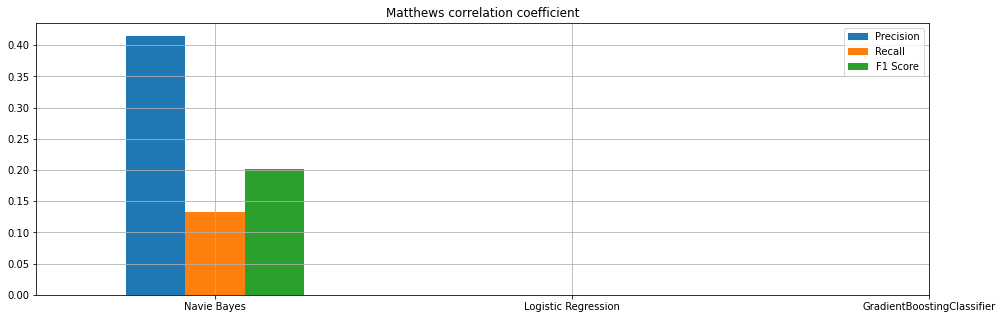

In [ ]:
#accuracies = pd.DataFrame(accuracies)
fig = results.plot.bar(figsize=(16, 5), grid=True)
plt.xticks(np.arange(3),('Navie Bayes','SVM', 'SGDClassifier'),rotation=0)
plt.legend(categories)
plt.title("Matthews correlation coefficient")
plt.show()